This file is used to explore the data and potentially clean the data for the project, this file will be rudimentary and is only for POC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1 - Onboarding and Initial Data Exploration 

In [2]:
#Reading Input Data set - Hotel Bookings
input_data = pd.read_csv('data\hotel_bookings.csv')

In [3]:
# Exploring Schema to understand the structure of data
print(input_data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [4]:
print(input_data.head())

          hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          no        342               2015               July   
1  Resort Hotel          no        737               2015               July   
2  Resort Hotel          no          7               2015               July   
3  Resort Hotel          no         13               2015               July   
4  Resort Hotel          no         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1           

In [5]:
print(input_data.describe())

           lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%         

In [6]:
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:

def create_data_dictionary(df):

    data_dict_list = []
    for column in df.columns:
        data_type = df[column].dtype

        unique_values = df[column].nunique()
        # If there are fewer than 10 unique values, list them directly; otherwise, show the count
        if unique_values <= 10:
            unique_vals = df[column].unique()  # Show unique values for categorical columns
        else:
            unique_vals = f"{unique_values} unique values"  # Indicate the number of unique values

        # Provide a description of the column based on its data type
        if data_type in ['int64', 'float64']:
            # For numerical columns, include min, max, mean, and standard deviation in the description
            description = (f"Min: {df[column].min()}, "
                           f"Max: {df[column].max()}, "
                           f"Mean: {df[column].mean():.2f}, "
                           f"Std: {df[column].std():.2f}")
        else:
            # For non-numerical columns, list the top 3 most common values
            description = f"Top 3 Values: {df[column].value_counts().index[:3].tolist()}"
        data_dict_list.append({
            "Feature": column,
            "Data Type": data_type,
            "Unique Values": unique_vals,
            "Description": description
        })

    data_dict = pd.DataFrame(data_dict_list)
    return data_dict

data_dictionary = create_data_dictionary(input_data)
print(data_dictionary.head())
data_dictionary.to_csv('Reports/Data_dictionary_report.csv')


              Feature Data Type               Unique Values  \
0               hotel    object  [Resort Hotel, City Hotel]   
1         is_canceled    object                   [no, yes]   
2           lead_time     int64           479 unique values   
3   arrival_date_year     int64          [2015, 2016, 2017]   
4  arrival_date_month    object            12 unique values   

                                      Description  
0    Top 3 Values: ['City Hotel', 'Resort Hotel']  
1                     Top 3 Values: ['no', 'yes']  
2     Min: 0, Max: 737, Mean: 104.01, Std: 106.86  
3  Min: 2015, Max: 2017, Mean: 2016.16, Std: 0.71  
4         Top 3 Values: ['August', 'July', 'May']  


## Handling Missing Values & Standardizing Data format

1. Handle Missing Values
We have identifed columns with missing values and decided on suitable imputation strategies. Here’s the plan:

    - children: Impute with the median or mode, as it's a small number of missing values.
    
    - country: Impute with the most frequent value or categorize missing as "Unknown."
    
    - agent and company: Since a significant portion is missing in company, we may drop it or create a category "Unknown" for missing values. The same applies to agent, but with a more tailored approach if required.

2. Standardize Data Formats
Convert reservation_status_date from string to a datetime format.
Ensure categorical columns (like hotel, is_canceled, etc.) have consistent string formatting and are ready for encoding.

3. Data Standardization
Convert columns like is_canceled from "yes"/"no" strings to binary (1/0).

In [8]:

# Impute 'children' column with the median value
input_data['children'].fillna(input_data['children'].median(), inplace=True)

# Impute 'country' column with the most frequent value
input_data['country'].fillna(input_data['country'].mode()[0], inplace=True)

# Explicitly cast 'agent' and 'company' columns to 'object' (string) type
input_data['agent'] = input_data['agent'].astype('object')
input_data['company'] = input_data['company'].astype('object')

# Impute 'agent' and 'company' columns with 'Unknown' to handle missing values
input_data['agent'].fillna('Unknown', inplace=True)
input_data['company'].fillna('Unknown', inplace=True)

# Verifing that missing values have been handled
missing_values_summary = input_data.isnull().sum()
missing_values_summary[missing_values_summary > 0]  # Should return an empty series if all NaNs are handled



Series([], dtype: int64)

In [9]:

# Impute 'children' column with the median value
input_data['children'].fillna(input_data['children'].median(), inplace=True)

# Impute 'country' column with the most frequent value
input_data['country'].fillna(input_data['country'].mode()[0], inplace=True)

# Explicitly cast 'agent' and 'company' columns to 'object' (string) type
input_data['agent'] = input_data['agent'].astype('object')
input_data['company'] = input_data['company'].astype('object')

# Impute 'agent' and 'company' columns with 'Unknown' to handle missing values
input_data['agent'].fillna('Unknown', inplace=True)
input_data['company'].fillna('Unknown', inplace=True)

# Verifing that missing values have been handled
missing_values_summary = input_data.isnull().sum()
missing_values_summary[missing_values_summary > 0]  # Should return an empty series if all NaNs are handled



Series([], dtype: int64)

In [11]:
# Standardize data format by converting 'reservation_status_date' to datetime
input_data['reservation_status_date'] = pd.to_datetime(input_data['reservation_status_date'])

# Convert 'is_canceled' column from 'yes'/'no' to binary (1/0) format
input_data['is_canceled'] = input_data['is_canceled'].apply(lambda x: 1 if x == 'yes' else 0)

# Display a summary of the changes to verify
input_data[['reservation_status_date', 'is_canceled']].head()

input_data.to_csv('cleaned_data.csv')


## Detect and Correct Outliers

### Identify Numerical Columns:
- We'll focus on columns with continuous numeric data, such as lead_time, adr (Average Daily Rate), and days_in_waiting_list.

### Detect Outliers:
- Use the Interquartile Range (IQR) method, which is robust against extreme values. Outliers will be defined as any data point beyond 1.5 times the IQR below the first quartile or above the third quartile.

Alternatively, we can use Z-scores to detect outliers by flagging values that fall beyond a certain threshold (e.g., 3 standard deviations from the mean).

### Correct Outliers:
- Outliers can be handled by capping them to the nearest non-outlier values (using the IQR boundaries) or by removing them from the dataset.

In [7]:

def cap_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds, numeric values can be updated as needed for POC I have taken 1.5
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

# List of columns to check for outliers -- These are specific columns based on the data exploration done earlier
outlier_columns = ['lead_time', 'adr', 'days_in_waiting_list']

# Apply the cap_outliers function to each column selected by us
for column in outlier_columns:
    input_data = cap_outliers(input_data, column)


input_data[outlier_columns].describe()


,lead_time,adr,days_in_waiting_list
count,119390.000000,119390.000000,119390.0
mean,102.229157,100.659305,0.0
std,101.158934,44.688946,0.0
min,0.000000,-6.380000,0.0
25%,18.000000,69.290000,0.0
50%,69.000000,94.575000,0.0
75%,160.000000,126.000000,0.0
max,373.000000,211.065000,0.0


The below code is to explore correlation between numerical features

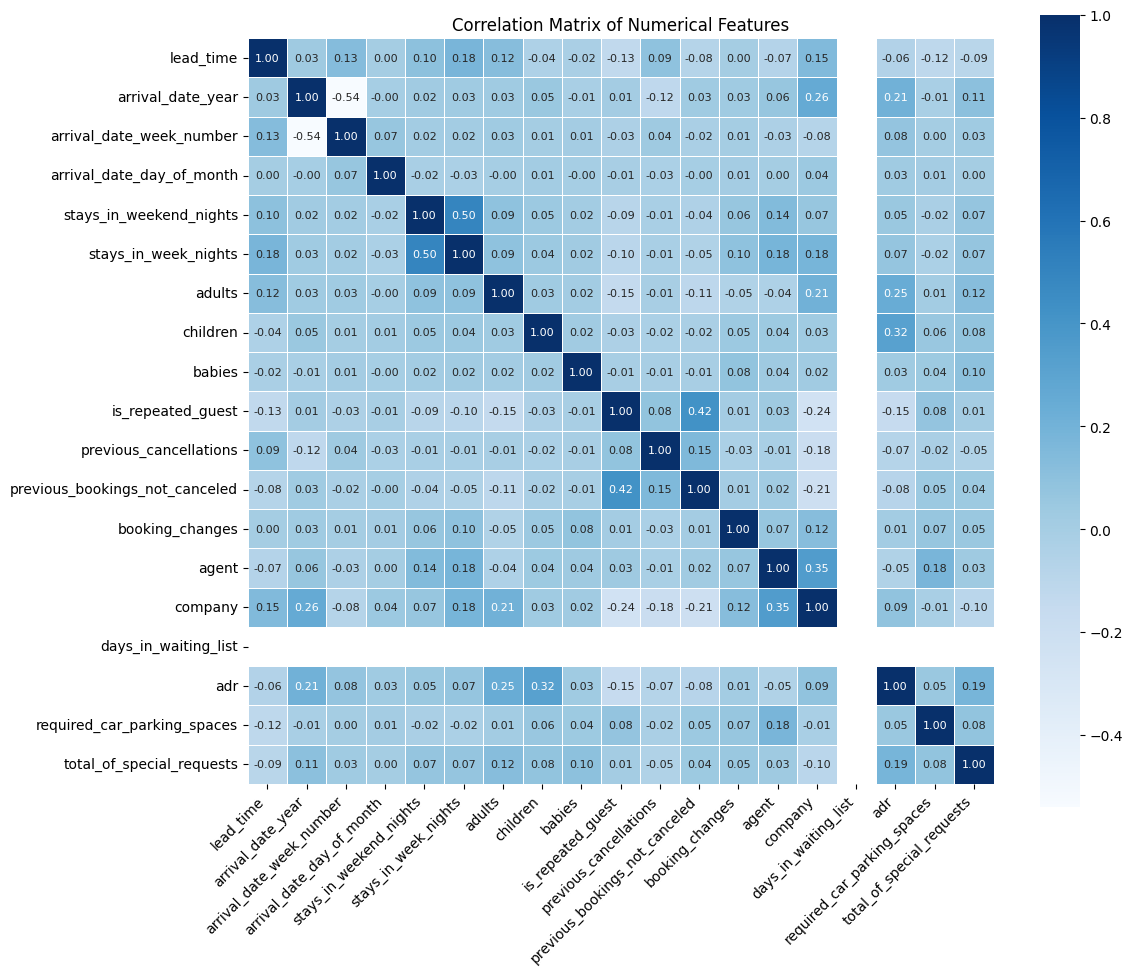

In [8]:

filtered_input = input_data.select_dtypes(include=['int','float'])
correlation_matrix = filtered_input.corr(method='pearson')
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f",
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout() 
plt.show()

Bootstrapping method - to generate additional training saples that maintain the original data distribution

In [8]:
# Bootstrapping to generate additional samples
num_samples = 5000

# Generating additional samples using bootstrapping
additional_samples = input_data.sample(n=num_samples, replace=True, random_state=42)

# Combining with the original dataset
augmented_data = pd.concat([input_data, additional_samples], ignore_index=True)

# Verifing the new dataset size
print("Original Dataset Size:", input_data.shape)
print("Augmented Dataset Size:", augmented_data.shape)


Original Dataset Size: (119390, 32)
Augmented Dataset Size: (124390, 32)


In [9]:
# Function to generate synthetic data by adding random noise
def generate_synthetic_data(df, num_samples):
    # Randomly sample from the original data
    synthetic_samples = df.sample(n=num_samples, replace=True, random_state=42).copy()
    
    # Add random noise to numerical columns to generate variations
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Apply random noise to each numerical column
    for column in numerical_columns:
        # Generate noise with a mean of 0 and a small standard deviation
        noise = np.random.normal(0, 0.05 * df[column].std(), size=num_samples)
        synthetic_samples[column] += noise
    
    return synthetic_samples

# Generate synthetic samples and concatenate with the original data
num_synthetic_samples = 5000
synthetic_samples = generate_synthetic_data(input_data, num_synthetic_samples)
augmented_data = pd.concat([input_data, synthetic_samples], ignore_index=True)

# Verifing the new dataset size
print("Original Dataset Size:", input_data.shape)
print("Augmented Dataset Size:", augmented_data.shape)

Original Dataset Size: (119390, 32)
Augmented Dataset Size: (124390, 32)
